<a href="https://colab.research.google.com/github/shen-michelle/5-gene-Metatasis-PCA/blob/main/TCGA_PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# call pandas data analysis package
import pandas as pd
import numpy as np
import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("PCA TCGA.csv")
# Read the file that is uploaded in the directory called "Filename.csv"

df = df.replace('NP', np.nan)
df = df.dropna(axis=0, how='all', subset=None, inplace=False)
df = df. dropna(axis=1, how='all')
# Cleanup dataset (drop rows and columns where all entries are NaN)

In [ ]:
features = df.columns

# Separating out the gene candidates
x = df.loc[:, features]

# fill NaN with 0
x = x.fillna(0)

# Separating out the labels that describe where samples came from
y = x.iloc[[0],:].values


# Standardizing the features
x = x.drop(columns='Genes')
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDF = pd.concat([principal_df, df.iloc[:, [0]]], axis=1)
print

<function print>

<Figure size 640x480 with 0 Axes>

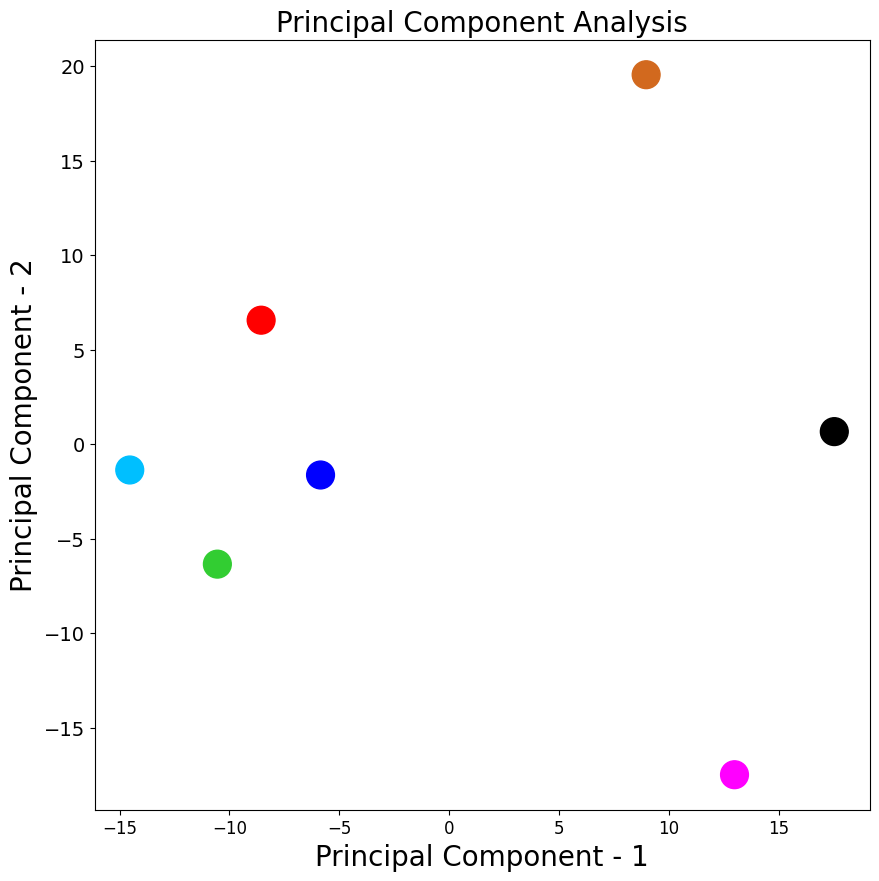

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = y
colors = np.array(["red","deepskyblue","limegreen","magenta","chocolate","black","blue"])

plt.scatter(finalDF.loc[:, 'principal component 1']
               ,finalDF.loc[:, 'principal component 2'], c = colors, s=400)
